# PERMUTATION AS POINT ON A SURFACE

This notebook implements an idea I had during my first year at the University.\
Given a set there are several ways to finds all the permutations of its elements.\
But there is no function that can be computed to produce them.\
And here is the idea I had:\
all permutaions shares the same norm (if we see a permutation as a vector). This is also a properties of all the points on the surface of an hyper-sphere.\
So? We can map the permutations on the surface of the hyper-sphere and using the correct geometry find a function to fit those points.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

we write here down the function to calculate all the permutations of a given set (we indicize it from 0 to n where n is the number of elements of the given set and then permute the indexes)

## Permutation function

In [2]:
#function that moves a given element to the right by a given number of spaces
# (swaps position with the element in the target position)
def move_left(key, start, step):
    bound = len(key)
    end = (start+step)%bound
    key = swap(key, start, end)
    return key

def swap(key, a, b):
    t = key[a]
    key[a] = key[b]
    key[b] = t
    return key

#this is the recursive function that computes all permutations of a given sequence
def permutation(sequence):
    # the two base cases (sequence of length 2 and 3) 
    # allow to calculate all their permutations simply using the move_left function
    if len(sequence) <= 3:
        keys = []
        copy_sequence = sequence.copy()
        keys.append(copy_sequence.copy())
        bound = len(sequence)
        index = 0 
        step = 1
        copy_sequence = move_left(copy_sequence, index, step)
        index = (index + step)%bound
        while copy_sequence != sequence:
            keys.append(copy_sequence.copy())
            copy_sequence = move_left(copy_sequence, index, step)
            index = (index + step)%bound
        return keys
    # non-base cases instead need to find the so-called "keys"
    # (read the theoretical explanation to understand the concept)
    # in order to proceed with the permutation through the use of the move_left function.
    # however, the keys are just the permutations of the sequence excluding
    # the first two elements starting from the left (hence the recursion)
    else:
        lower_keys = permutation(sequence[2::])
        keys = []
        for key in lower_keys:
            original_sequence = sequence[0:2] + key
            copy_sequence = original_sequence.copy()
            keys.append(copy_sequence.copy())
            bound = len(original_sequence)
            index = 0
            step = 1
            copy_sequence = move_left(copy_sequence, index, step)
            index = (index + step)%bound            
            while copy_sequence != original_sequence:
                keys.append(copy_sequence.copy())
                copy_sequence = move_left(copy_sequence, index, step)
                index = (index + step)%bound
        return keys

just to try that's everything is alright lol, 
never trust your code

In [22]:
permutations = permutation([1, 2, 3])
print(permutations)

[[1, 2, 3], [2, 1, 3], [2, 3, 1], [1, 3, 2], [3, 1, 2], [3, 2, 1]]


## Plot

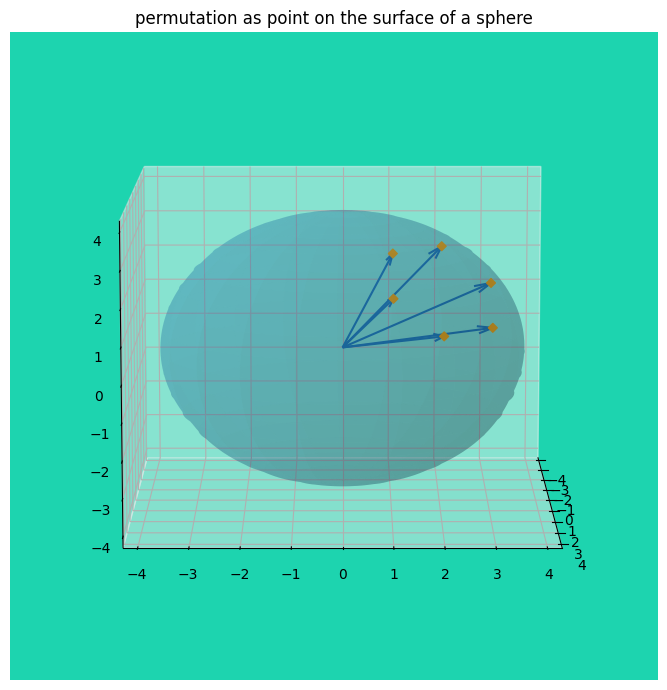

In [29]:
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d

#setting the plot to draw in 3D
fig = plt.figure(figsize = (20, 7))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = plt.axes(projection ="3d", )
plt.title("permutation as point on the surface of a sphere")

#draw the sphere
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
r = np.sqrt(1**2 + 2**2 + 3**2)

xs = r*np.outer(np.cos(u), np.sin(v))
ys = r*np.outer(np.sin(u), np.sin(v))
zs = r*np.outer(np.ones(np.size(u)), np.cos(v))

ax.set_facecolor('#1DD4AF')

#now we divide the permutations between x, y, z

x = []
y = []
z = []

for perm in permutations:
    x.append(perm[0])
    y.append(perm[1])
    z.append(perm[2])
    #gonna plot some arrow pointin to the point form the center just because
    ax.quiver(0,0,0,perm[0],perm[1],perm[2],length=1.0, arrow_length_ratio=0.1)

ax.plot_surface(xs, ys, zs, rstride = 5, cstride = 5, alpha=0.2)

ax.scatter3D(x, y, z, marker='D', color = "orange", alpha=1)

ax.view_init(10, 0, 0)
plt.show()


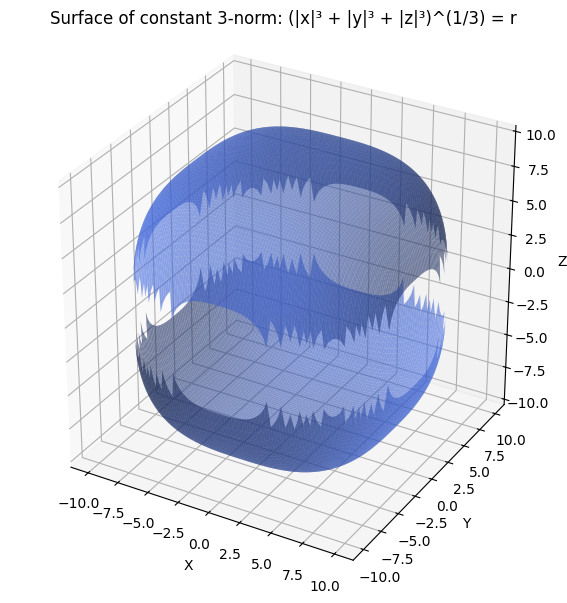

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set radius
r = 10

# Generate grid
n = 100
x = np.linspace(-r, r, n)
y = np.linspace(-r, r, n)
X, Y = np.meshgrid(x, y)

# Compute Z for upper and lower surfaces of the 3-norm sphere
# |x|^3 + |y|^3 + |z|^3 = r^3  =>  z = ±((r^3 - |x|^3 - |y|^3))^(1/3)
Z_part = r**3 - np.abs(X)**3 - np.abs(Y)**3
Z_part[Z_part < 0] = np.nan  # Mask invalid points

Z_upper = np.cbrt(Z_part)
Z_lower = -np.cbrt(Z_part)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_upper, color='royalblue', alpha=0.6, rstride=1, cstride=1)
ax.plot_surface(X, Y, Z_lower, color='royalblue', alpha=0.6, rstride=1, cstride=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface of constant 3-norm: (|x|³ + |y|³ + |z|³)^(1/3) = r')
ax.set_box_aspect([1,1,1])
plt.show()


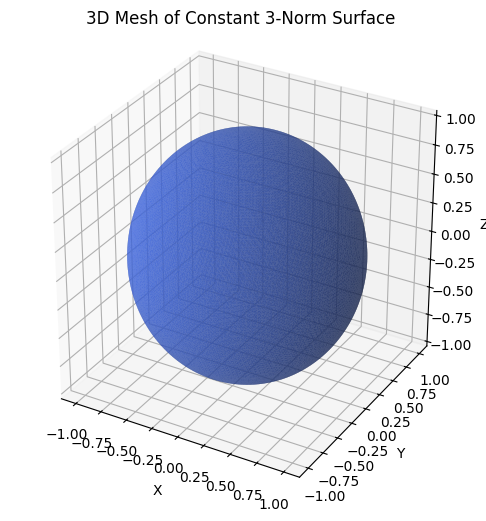

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure  # for marching cubes

# Parameters
r = 1.0
n = 80  # grid resolution

# Define grid
x = np.linspace(-r, r, n)
y = np.linspace(-r, r, n)
z = np.linspace(-r, r, n)
X, Y, Z = np.meshgrid(x, y, z)

# Implicit surface function for the 3-norm sphere
F = np.abs(X)**2 + np.abs(Y)**2 + np.abs(Z)**2 

# Extract surface where F = r^3
verts, faces, _, _ = measure.marching_cubes(F, level=r**2)

# Convert to real coordinates
verts = verts / (n - 1) * 2 * r - r  # rescale to [-r, r]

# Plot 3D mesh
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(
    verts[:, 0], verts[:, 1], faces, verts[:, 2],
    color='royalblue', lw=0.1, alpha=0.7
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh of Constant 3-Norm Surface')
ax.set_box_aspect([1, 1, 1])
plt.show()


how we can clearly see in fact the point perfectly sit on the surface of the sphere.
if we manage to find a relationship between the various angles connecting the points at the center of the sphere we will probably be able to extend the principle in n dimensions so as to have a function capable of calculating the n! permutations of a given indexed set simply by calculating the development of the angles

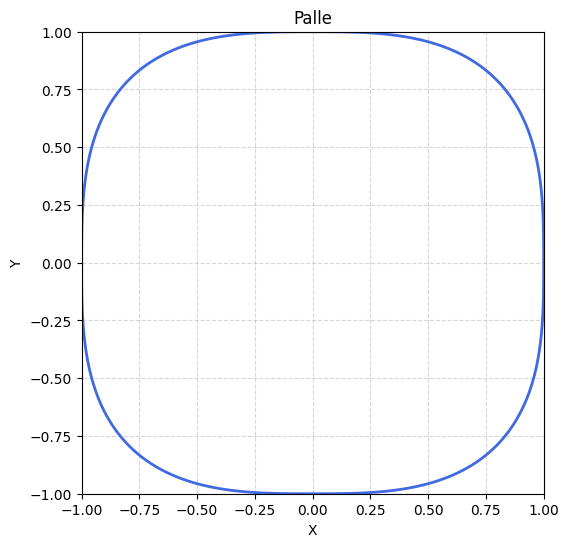

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vector = (1, 2)

for i in range (1, 10):
    # Parameters
    r = np.sqrt(vector[0]**i + vector[1]**i)
    n = 400

    # Generate grid
    x = np.linspace(-r, r, n)
    y = np.linspace(-r, r, n)
    X, Y = np.meshgrid(x, y)

    # Implicit function
    F = np.abs(X)**i + np.abs(Y)**i

    # Plot contour where F = r^3
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, F, levels=[r**3], colors='royalblue', linewidths=2)

plt.gca().set_aspect('equal')
plt.title('Palle')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
